In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets

# Importando nuestros datos

Comenzamos obteniendo los archivos que contienen nuestros datasets, definiendo un path para cada uno para despues importarlos como dataframes

In [2]:
data_path_sniim = os.path.join("..","..","data","clean_data","precios_sniim.parquet")
data_path_siap = os.path.join("..","..","data","clean_data","siap.parquet.zip")
data_path_siap_wide = os.path.join("..","..","data","clean_data","siap_wide.parquet.zip")

In [3]:
df_precios_sniim = pd.read_parquet(data_path_sniim)
df_cultivos_siap = pd.read_parquet(data_path_siap)
df_cultivos_siap_wide = pd.read_parquet(data_path_siap_wide)

Después, podemos obtener algunas muestras de nuestras dataframes para verificar su estructura, las cuales están especificadas en nuestros diccionario de datos.

In [4]:
df_precios_sniim.sample(10)

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
1838900,2020-01-15,Chile De Arbol Seco,Kilogramo,Nayarit,Nayarit,Nayarabastos de Tepic,109.0,111.0,110.0
1979234,2021-02-04,Manzana Golden Delicious,Kilogramo,Chihuahua,Coahuila,"Central de Abasto de La Laguna, Torreón",16.0,17.0,16.5
1053063,2022-05-11,Chile Caloro,Kilogramo,Nayarit,Nayarit,Nayarabastos de Tepic,36.0,38.0,37.0
1736667,2021-11-26,Caña,Pieza,Nayarit,Nayarit,Mercado de abasto 'Adolfo López Mateos' de Tepic,15.0,17.0,16.0
1923231,2022-12-19,Champiñon,Kilogramo,Puebla,Veracruz,Central de Abasto de Minatitlán,60.0,80.0,70.0
527594,2022-03-03,Mango Tommy,Kilogramo,Quintana Roo,Quintana Roo,"Mercado de Chetumal, Quintana Roo",25.0,25.0,25.0
908836,2020-10-05,Papaya Roja,Kilogramo,Colima,Baja California Sur,Unión de Comerciantes de La Paz,19.0,33.0,24.0
240976,2023-06-12,Limon Con Semilla Sin Clasificacion,Kilogramo,Colima,Chihuahua,Mercado de Abasto de Cd. Juárez,22.0,22.0,22.0
263882,2023-07-10,Esparrago,Kilogramo,Nayarit,Nayarit,Nayarabastos de Tepic,137.0,139.0,138.0
590536,2022-01-20,Zanahoria Leña,Kilogramo,Nayarit,Nayarit,Mercado de abasto 'Adolfo López Mateos' de Tepic,12.0,14.0,13.0


In [5]:
df_cultivos_siap_wide.sample(10)

,Entidad,Municipio,Sembrada (ha),Cosechada (ha),Siniestrada (ha),Producción,Rendimiento (udm/ha),Cultivo,fecha
532,Tlaxcala,Panotla,26.0,0.0,0.0,0.00,0.00,avena forrajera en verde,2022-01-01
866,Oaxaca,San Juan Teitipac,6.0,0.0,0.0,0.00,0.00,frijol,2022-10-01
1261,Oaxaca,San Pedro Y San Pablo Tequixtepec,433.0,34.0,0.0,92.60,2.72,maíz grano,2022-08-01
189,Oaxaca,Santa María Zacatepec,4.2,4.2,0.0,19.02,4.53,naranja,2021-11-01
61,México,Teotihuacán,1540.0,864.0,0.0,2956.77,3.42,tuna,2020-07-01
24,Guanajuato,Yuriria,640.0,570.0,0.0,1045.00,1.83,garbanzo grano,2021-04-01
65,Veracruz,Misantla,125.0,0.0,0.0,0.00,0.00,toronja (pomelo),2020-09-01
66,Guanajuato,Manuel Doblado,92.0,55.0,0.0,2090.00,38.00,cebolla,2021-06-01
46,Chihuahua,Madera,149.0,0.0,0.0,0.00,0.00,manzana,2020-05-01
199,Oaxaca,San Juan Bautista Valle Nacional,7.8,0.0,0.0,0.00,0.00,naranja,2022-02-01


Antes de proseguir, podemos modificar las propiedades de seaborn para las visualizaciones que haremos mas adelante, seleccionando el estilo `whitegrid` y ajustando el tamaño de fuente a 1.2:

In [6]:
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

# Analisis para datos sobre precios SNIIM

Antes de comenzar, crearemos un par de columnas en nuestra dataframe para indicar tanto el mes como el año de cada entrada:

In [7]:
df_precios_sniim["año"] = df_precios_sniim["fecha"].dt.year
df_precios_sniim["mes"] = df_precios_sniim["fecha"].dt.month

Además, revisaremos nuestro dataframe para tratar de identificar datos faltantes, así como los tipos de cada una de nuestras columnas.

In [8]:
df_precios_sniim.isna().sum()

fecha           0
producto        0
presentacion    0
origen          0
destino         0
central         0
precio_min      0
precio_max      0
precio_frec     0
año             0
mes             0
dtype: int64

In [9]:
df_precios_sniim.dtypes

fecha           datetime64[us]
producto                object
presentacion            object
origen                  object
destino                 object
central                 object
precio_min             float64
precio_max             float64
precio_frec            float64
año                      int32
mes                      int32
dtype: object

De las celdas anteriores podemos aprecias que en este dataset no existen datos faltantes, y que tenemos una columna fecha tiene un tipo de dato de `datetime`, las columnas producto, presentacion, origen, destino y central tienen un tipo de `object` ya que se trata de cadenas de caracteres, y el resto tiene un tipo numérico, ya sea `float64` o `int32`.

Podemos transformar las columnas de tipo `object` al tipo `category`, para una mayor facilidad y rapidez de procesamiento de los datos.

In [10]:
df_precios_sniim["producto"] = df_precios_sniim["producto"].astype("category")
df_precios_sniim["presentacion"] = df_precios_sniim["presentacion"].astype("category")
df_precios_sniim["origen"] = df_precios_sniim["origen"].astype("category")
df_precios_sniim["destino"] = df_precios_sniim["destino"].astype("category")
df_precios_sniim["central"] = df_precios_sniim["central"].astype("category")

In [11]:
df_precios_sniim.dtypes

fecha           datetime64[us]
producto              category
presentacion          category
origen                category
destino               category
central               category
precio_min             float64
precio_max             float64
precio_frec            float64
año                      int32
mes                      int32
dtype: object

## Tendencia historica de los precios (2020 - 2023)

Para comenzar, podemos tratar de visualizar el cambio en los precios diarios para los productos de nuestro dataset. Sin embargo, existen algunos puntos importantes a considerar:
* **La cantidad de datos**, ya que nuestro dataframe cuenta con 2 019 574 entradas, para diversos precios de diferentes productos en el periodo 2020 - 2023 a lo largo del país.
* **La cantidad de productos**, en la columna `producto` de nuestro dataframe, tenemos 199 productos unicos, por lo que visualizar la variación o en el precio de cada uno al mismo tiempo puede no ser lo más práctico

In [12]:
df_precios_sniim.shape

(2019574, 11)

In [13]:
df_precios_sniim["producto"].nunique()

199

Sin embargo, podemos hacer uso de las librerias `ipywidgets` y `seaborn` para agregar interactividad a nuestros plots, esto nos permitirá agilizar el proceso de visualización de nuestros datos.

Para ello, primero definimos una función que nos generará un gráfico de los precios promedios diarios de un producto dado a lo largo del periodo seleccionado (2020 - 2023), ademas, podemos agregar una media móvil exponencial para tratar de apreciar mejor la tendencia del precio del producto a lo través del tiempo. Esto lo podemos lograr utilizando la libreria `seaborn`, ademas de los métodos `resample` y `ewm` de nuestro dataframe.

In [14]:
def graficar_precios(cultivo):
    """
    Grafica el promedio de los precios diarios de un cultivo desde el año 2020 hasta la fecha del ultimo registro, 
    ademas de una linea de tendencia (filtro exponencial)
    """
    subset_df = df_precios_sniim[df_precios_sniim["producto"] == cultivo]
    
    subset_df = subset_df.resample('D', on='fecha').mean(numeric_only=True)
    subset_df["ewm"] = subset_df["precio_frec"].ewm(span=14).mean()
    #subset_df["año"] = subset_df.index.year
    
    fig,ax = plt.subplots()
    
    sns.lineplot(x="fecha",
                 y="ewm",
                 hue="año",
                 data=subset_df,
                 errorbar=None,
                 ax=ax,
                 palette="tab10")
    
    sns.scatterplot(x="fecha",
                    y="precio_frec",
                    hue="año",
                    data=subset_df,
                    ax=ax,
                    palette="tab10",
                    s=25,
                    alpha=0.5)
    
    ax.title.set_text(f"Historial de precios para {cultivo} (promedio diario)")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Precio por kg, MXN")
    ax.grid(axis='y')
    ax.tick_params(axis='x',rotation=90);
    ax.legend(title='Año', labels=["2020","2021","2022","2023"])
    
    fig.set_size_inches(16,9)
    
    plt.show()
    
    return

Después obtenemos una lista de los valores únicos de la columna producto, la cual podremos utilizar en nuestro widget para seleccionar el producto de nuestro interés.

In [15]:
lista_productos = sorted(list(df_precios_sniim["producto"].unique()))
lista_anios = [2020,2021,2022,2023]
#lista_productos[:5]

Finalmente, generamos un widget de tipo `Dropdown` el cual tomará los valores de la lista anterior, y utilizando la función `interact` de `ipywidgets`, podemos generar el gráfico de tendencia del producto que seleccionemos en nuestro widget, ya que al seleccionarlo se ejecutará la funcion `graficar_precios`, la cual tomará como valor el producto seleccionado de la lista.

In [16]:
dd_productos = widgets.Dropdown(options=lista_productos,
                      value=lista_productos[0],
                      description="Producto: ")

widgets.interact(graficar_precios,cultivo=dd_productos)

interactive(children=(Dropdown(description='Producto: ', options=('Acelga', 'Aguacate Criollo', 'Aguacate Hass…

<function __main__.graficar_precios(cultivo)>

Con la celda anterior podemos apreciar rápida y facilmente las tendencias para diversos productos, podemos ver que para productos como el **Tomate Rojo, el Saladette y el Verde**, a pesar de algunas variaciones que parecen ser estacionarias, el precio se ha mantenido en el rango de los $20.00 pesos por kilo en promedio. Sin embargo, si se repiten los patrones, puede que el precio de estos alcance un pico en los próximos meses.

Para el caso del **Limón**, podemos ver que todas las variedades de éste tuvieron un gran pico en el su precio a principios del 2022, incluso el #2 alcanzo un precio promedio diario de mas de $70.00 pesos por kilo en este periodo. Además, podemos ver que todas las variedades (#2,#3,#4,#5 y sin semilla) de este producto muestran una tendencia a la alta a lo largo de estos últimos meses.

Por otro lado, vemos que para las diversas variedades de **Manzana**, su precio promedio ha ido en constante aumento desde el 2020 hasta la fecha, y segun las tendencias más actuales, esta alza podria continuar al menos en el corto plazo.

Para el caso del **Plátano**, parece ser que tanto la variedad Chiapas como el resto han estado experimentando un lento pero constante aumento en su precio desde el 2020. El mismo comportamiento parecen estarlo experimentando las diferentes presentaciones de la **Guayaba** y la **Piña**, esta última ha estado experimentando un aumento más pronunciado en su precio promedio en las últimas semanas.


## Tendencia anual

Realizando un procedimiento similar, podemos generar una grafica específica para cada año, esto permite estudiar con un poco mas de detalles la tendencia de los precios para un año en específico (o bien, simplemente para el año en curso). Además, podemos agregar un mensaje para indicar en donde y cuando se registraron los precios más altos y más bajos para el producto en el año seleccionado.

In [17]:
def grafica_anio(cultivo,anio):
    """
    Grafica el promedio de los precios de un producto para un anio dado, ademas de una linea de tendencia
    """
    subset_df = df_precios_sniim[df_precios_sniim["producto"] == cultivo]
    subset_df = subset_df[subset_df["año"] == anio]
    
    try:
        subset_df = subset_df.resample('D', on='fecha').mean(numeric_only=True)
        subset_df["ewm"] = subset_df["precio_frec"].ewm(span=7).mean()

        fig,ax = plt.subplots()

        sns.lineplot(x="fecha",
                     y="ewm",
                     data=subset_df,
                     errorbar=None,
                     ax=ax)

        sns.scatterplot(x="fecha",
                        y="precio_frec",
                        data=subset_df,
                        ax=ax,
                        s=25,
                        alpha=0.5)

        ax.title.set_text(f"Historial de precios para {cultivo}, año: {anio} (promedio diario)")
        ax.set_xlabel("Fecha")
        ax.set_ylabel("Precio por kg, MXN")
        ax.grid(axis='y')
        ax.tick_params(axis='x',rotation=90);

        fig.set_size_inches(16,9)
        
        subset_df2 = df_precios_sniim[df_precios_sniim["producto"] == cultivo]
        subset_df2 = subset_df2[subset_df2["año"] == anio]
        
        fecha_max = subset_df2[subset_df2["precio_max"] == subset_df2["precio_max"].max()]["fecha"].iloc[0]
        central_max = subset_df2[subset_df2["precio_max"] == subset_df2["precio_max"].max()]["central"].iloc[0]
        precio_max = subset_df2["precio_max"].max()
        
        print(f"Precio maximo: ${precio_max:.2f}/kg el {fecha_max.strftime('%d-%m-%Y')} en {central_max}")
        
        fecha_min = subset_df2[subset_df2["precio_min"] == subset_df2["precio_min"].min()]["fecha"].iloc[0]
        central_min = subset_df2[subset_df2["precio_min"] == subset_df2["precio_min"].min()]["central"].iloc[0]
        precio_min = subset_df2["precio_min"].min()
        
        print(f"Precio minimo: ${precio_min:.2f}/kg el {fecha_min.strftime('%d-%m-%Y')} en {central_min}")

        plt.show()
    
    except:
        print("No hay datos para esa combinacion")
    
    return

In [18]:
dd_productos = widgets.Dropdown(options=lista_productos,
                      value=lista_productos[0],
                      description="Producto: ")

dd_anios = widgets.Dropdown(options=lista_anios,
                      value=lista_anios[-1],
                      description="Año: ")

widgets.interact(grafica_anio,cultivo=dd_productos,anio=dd_anios)

interactive(children=(Dropdown(description='Producto: ', options=('Acelga', 'Aguacate Criollo', 'Aguacate Hass…

<function __main__.grafica_anio(cultivo, anio)>

## Distribución y variación de nuestros datos

Siguiendo una lógica similar a la anterior, podemos generar un par de gráficas que nos ayudarán a analizar mejor la distribución de los precios en el año, así como su variación. Para esto, podemos definir una función que genere un par de gráficos:

* Un diagrama de cajas (`boxplot`) de los precios del producto seleccionado **por mes**, lo cual nos puede ayudar a visualizar mejor la dispersión de nuestros precios, así como identificar posibles valores *aberrantes* (es decir, precios anormalmente altos o anormalmente bajos) en nuestros precios

* Un histograma (`histplot`) para visualizar mejor la distribución de los precios muestreados a lo largo del año.

In [19]:
def graficar_dist_precios(producto):
    """
    Genera dos diagramas:
        - Un diagrama de cajas con los datos de cada producto por mes (2023)
        - Un histograma de la distribucion de los precios para el producto dado en el anio (2023)
    """
    df = df_precios_sniim.copy()
    
    df_filter = df[(df["producto"] == producto) & (df["año"] == 2023)]
    
    try:
        fig, (ax1,ax2) = plt.subplots(2,1)

        sns.boxplot(x="mes",
                    y="precio_frec",
                    data=df_filter,
                    ax=ax1)

        ax1.title.set_text(f"Diagrama de cajas de precios por mes para {producto}")
        ax1.set_xlabel("Mes")
        ax1.set_ylabel("Precio por kg, MXN")
        
        sns.histplot(x="precio_frec",
                   data=df_filter,
                   ax=ax2,kde=True)
        
        ax2.title.set_text(f"Histograma de precios en el año para {producto}")
        ax2.set_xlabel("Precio mas frecuente")

        fig.set_size_inches(16,9)
        plt.tight_layout()
        plt.show()
    
    except:
        raise ValueError("Error! Parece que algo salio mal.")

In [20]:
dd_productos_hist = widgets.Dropdown(options=lista_productos,
                      value=lista_productos[0],
                      description="Producto: ")

widgets.interact(graficar_dist_precios,producto = dd_productos_hist)

interactive(children=(Dropdown(description='Producto: ', options=('Acelga', 'Aguacate Criollo', 'Aguacate Hass…

<function __main__.graficar_dist_precios(producto)>

Con los diagramas anteriores, principalmente con el de cajas, podemos apreciar mejor la variabilidad de los precios, ya que en casos como el de la **Coliflor** o el **Brócoli**, si bien la mediana de los precios se mantiene aparentemente constante a lo largo del año, podemos apreciar que hay algunos meses donde la variación (rango) de los precios puede ser mas amplia que en otros, e incluso en algunos meses se pueden detectar valores anormales de los  mismos (datos aberrantes).

Además, en estos diagramas podemos apreciar también que la mayoría de los datos aberrantes, u *outliers* se encuentran ubicadas en el extremo superior de las distribuciones. Esto se ve en el diagrama de cajas como los puntos individuales que aparecen por encima del bigote superior, y en los histogramas como las colas que aparecen en el lado izquierdo de éste.

Tal es el caso de productos como el **ejote**, **zanahoria**, **perejil**, o el **pepino**, entre muchos otros. Estos outliers representan precios anormalmente altos que fueron registrados en varias centrales en el país.

## Desglose mensual de los precios

Ademas de las tendencias anuales y de las distribuciones de nuestros datos, otro de los paramétros de interés en nuestro análisis es el de los **promedios mensuales**, y más específicamente, su desglose por municipio.

De manera similar a lo anterior, podemos definir una función que nos ayude a visualizar mas facilmente estos promedios mensuales, y apoyandonos en la libreria de `ipywidgets`, podemos definir tanto el producto como la central de nuestro interés.

In [21]:
def graficar_promedios_mensuales(producto,central):
    """
    Genera una grafica (pointplot) con los promedios mensuales para el producto dado en la central dada
    """
    df = df_precios_sniim.copy()
    
    df_filter = df[(df["producto"] == producto) & (df["año"] == 2023)]
    df_grouped = df_filter.groupby(["central","mes"])["precio_frec"].mean().to_frame()
    
    df_unstacked = df_grouped.unstack()
    df_unstacked.columns = df_unstacked.columns.droplevel()
    df_unstacked = df_unstacked.reset_index()
    df_unstacked.columns.name=None
    
    df_melted = df_unstacked.melt(id_vars=["central"],var_name="mes",value_name="precio_promedio").dropna()
    
    dict_meses = {1: "Enero",
                  2: "Febrero",
                  3: "Marzo",
                  4: "Abril",
                  5: "Mayo",
                  6: "Junio",
                  7: "Julio",
                  8: "Agosto",
                  9: "Septiembre",
                  10: "Octubre",
                  11: "Noviembre",
                  12: "Diciembre"}
    
    df_melted["mes"] = df_melted["mes"].map(dict_meses)
    df_final = df_melted[df_melted["central"] == central]
    
    try:
        fig, ax = plt.subplots()

        sns.pointplot(x="mes",
                      y="precio_promedio",
                      data=df_final,
                      ax=ax,
                      color='r',
                      errorbar=None)

        ax.title.set_text(f"Precios mensuales para {producto} en {central} (promedio mensual)")
        ax.set_xlabel("Mes")
        ax.set_ylabel("Precio por kg, MXN")
        ax.grid(axis='x')

        fig.set_size_inches(16,9)
        plt.show()
    
    except:
        raise ValueError(f"No existen datos para {producto} en {central}")

    df_final.columns = ["Central","Mes","Precio promedio por kg, MXN"]
    df_final = df_final.style.set_caption(f"Desglose de precios promedios mensuales para {producto}").hide(axis="index")
    display(df_final)
        
    return

def obtener_valores_unicos(df,columna):
    """
    Regresa una lista con los valores unicos de la columna 'columna' en el dataframe 'df', ordenados.
    """
    return sorted(list(df[columna].unique()))

def fijar_central(producto):
    """
    Genera un widget (dropdown) con todas las centrales posibles para el producto dado en el argumento, despues 
    ejecuta la funcion 'graficar_promedios_mensuales' con el producto dado en el argumento y la central seleccionada
    """
    df = df_precios_sniim.copy()
    subset_df = df[(df["producto"] == producto) & (df["año"] == 2023)]
    
    lista_centrales = obtener_valores_unicos(subset_df,"central")
    
    dd_centrales = widgets.Dropdown(options=lista_centrales,
                      value=lista_centrales[0],
                      description="Central: ")
    
    widgets.interact(graficar_promedios_mensuales,producto=widgets.fixed(producto),central=dd_centrales)
    
    return

In [22]:
dd_productos2 = widgets.Dropdown(options=lista_productos,
                      value=lista_productos[0],
                      description="Producto: ")

widgets.interact(fijar_central,producto=dd_productos2)

interactive(children=(Dropdown(description='Producto: ', options=('Acelga', 'Aguacate Criollo', 'Aguacate Hass…

<function __main__.fijar_central(producto)>

De esta forma podemos obtener un valor más exacto del promedio mensual para cada producto en las diferentes centrales de abasto del país.

# Análisis de producción agrícola (SIAP)

Ahora podemos proceder con el análisis de los datos referentes a la producción agrícola de diversos productos agroalimentarios. Podemos comenzar tratando de identificar datos faltantes en este dataframe.

In [23]:
df_cultivos_siap_wide.isna().sum()

Entidad                 0
Municipio               0
Sembrada (ha)           0
Cosechada (ha)          0
Siniestrada (ha)        0
Producción              0
Rendimiento (udm/ha)    0
Cultivo                 0
fecha                   0
dtype: int64

In [24]:
df_cultivos_siap_wide.dtypes

Entidad                       category
Municipio                     category
Sembrada (ha)                  float64
Cosechada (ha)                 float64
Siniestrada (ha)               float64
Producción                     float64
Rendimiento (udm/ha)           float64
Cultivo                       category
fecha                   datetime64[us]
dtype: object

In [25]:
df_cultivos_siap_wide.head()

,Entidad,Municipio,Sembrada (ha),Cosechada (ha),Siniestrada (ha),Producción,Rendimiento (udm/ha),Cultivo,fecha
0,Aguascalientes,Aguascalientes,2850.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
1,Aguascalientes,Asientos,1560.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
2,Aguascalientes,Calvillo,110.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
3,Aguascalientes,Cosío,650.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01
4,Aguascalientes,Jesús María,600.0,0.0,0.0,0.0,0.0,maíz forrajero en verde,2023-05-01


## ¿Qué cultivos analizar?

Revisando la columna `cultivo` de nuestro dataframe, podemos apreciar que tenemos un total de 64 cultivos diferentes, pero ¿realmente son todos estos relevantes para nuestro análisis?

In [26]:
df_cultivos_siap_wide["Cultivo"].unique()

['maíz forrajero en verde', 'avena grano', 'nuez', 'coliflor', 'sandía', ..., 'tuna', 'maguey pulquero', 'frijol', 'guayaba', 'espárrago']
Length: 64
Categories (64, object): ['agave', 'aguacate', 'ajo', 'ajonjolí', ..., 'tuna', 'uva', 'zanahoria', 'zarzamora']

Sin embargo, tenemos una lista de cultivos que serán relevantes para este análisis, por lo que podemos filtrar nuestro dataframe para que solo contengan las entradas referentes a estos cultivos.

In [27]:
cultivos_relevantes = ['Tomate rojo (jitomate)', 'Chile verde', 'Limón', 'Pepino', 'Plátano', 'Mango', 
              'Garbanzo grano', 'Brócoli', 'Cebolla', 'Sandía', 'Papaya', 'Calabacita', 'Lechuga', 
              'Tomate verde', 'Espárrago', 'Frambuesa', 'Nopalitos', 'Nuez', 'Fresa', 'Toronja (pomelo)', 
              'Zarzamora', 'Piña', 'Coliflor', 'Frijol', 'Berenjena', 'Uva', 'Guayaba', 'Naranja', 
              'Papa', 'Melón', 'Manzana', 'Pera', 'Durazno']

cultivos_siap = [x.lower() for x in cultivos_relevantes]

In [28]:
df_cultivos_siap_wide.columns=["entidad","municipio","sembrada_ha","cosechada_ha","siniestrada_ha","produccion_ton","rendimiento","cultivo","fecha"]

Podemos proceder a filtrar nuestro dataframe para que solo contenga estos cultivos. Lo primero es transformar nuestra columna al tipo string para poder compararla mas facilmente con nuestra lista. Además, podemos agregar columnas indicadoras de año y mes para una mejor distinción de las entradas.

In [29]:
df_cultivos_siap_wide["cultivo"] = df_cultivos_siap_wide["cultivo"].astype("string")

In [30]:
df_cultivos_siap_wide["mes"] = df_cultivos_siap_wide["fecha"].dt.month
df_cultivos_siap_wide["año"] = df_cultivos_siap_wide["fecha"].dt.year

In [31]:
df_cultivos_siap_filtered = df_cultivos_siap_wide[(df_cultivos_siap_wide["cultivo"].isin(cultivos_siap))]
df_cultivos_siap_filtered[df_cultivos_siap_filtered["cultivo"]=="berenjena"].head()

,entidad,municipio,sembrada_ha,cosechada_ha,siniestrada_ha,produccion_ton,rendimiento,cultivo,fecha,mes,año
0,Baja California Sur,La Paz,6.00,6.00,0.0,180.96,30.16,berenjena,2022-11-01,11,2022
1,Baja California Sur,Los Cabos,7.75,7.75,0.0,114.00,14.71,berenjena,2022-11-01,11,2022
2,Michoacán,Churintzio,6.00,6.00,0.0,245.00,40.83,berenjena,2022-11-01,11,2022
3,Michoacán,Yurécuaro,13.00,13.00,0.0,783.90,60.30,berenjena,2022-11-01,11,2022
4,Morelos,Miacatlán,7.00,4.00,0.0,49.00,12.25,berenjena,2022-11-01,11,2022


In [32]:
df_cultivos_siap_wide["cultivo"] = df_cultivos_siap_wide["cultivo"].astype("category")

In [33]:
df_cultivos_siap_filtered.loc[:,"cultivo"] = df_cultivos_siap_filtered.loc[:,"cultivo"].astype("category")

Finalmente, verificamos que la cantidad de categorias en nuestro dataframe cambio, y que ahora solo contiene los cultivos de interés.

In [34]:
df_cultivos_siap_filtered["cultivo"].unique()

['nuez', 'coliflor', 'mango', 'manzana', 'pepino', ..., 'naranja', 'frambuesa', 'nopalitos', 'frijol', 'guayaba']
Length: 26
Categories (26, string): [berenjena, calabacita, cebolla, chile verde, ..., tomate verde, toronja (pomelo), uva, zarzamora]

In [35]:
df_grouped_siap = df_cultivos_siap_filtered.groupby(["entidad","cultivo","año","mes"])

In [37]:
df_totales_mes_siap = df_grouped_siap[["sembrada_ha","cosechada_ha","siniestrada_ha","produccion_ton","rendimiento"]].sum()

In [38]:
df_totales_mes_siap["sembrada_ha_mes"] = df_totales_mes_siap["sembrada_ha"].diff()
df_totales_mes_siap["cosechada_ha_mes"] = df_totales_mes_siap["cosechada_ha"].diff()
df_totales_mes_siap["siniestrada_ha_mes"] = df_totales_mes_siap["siniestrada_ha"].diff()
df_totales_mes_siap["produccion_ton_mes"] = df_totales_mes_siap["produccion_ton"].diff()
df_totales_mes_siap.head(15)

sembrada_ha  cosechada_ha  siniestrada_ha  \
entidad        cultivo   año  mes                                              
Aguascalientes berenjena 2020 1            0.0           0.0             0.0   
                              2            0.0           0.0             0.0   
                              3            0.0           0.0             0.0   
                              4            0.0           0.0             0.0   
                              5            0.0           0.0             0.0   
                              6            0.0           0.0             0.0   
                              7            0.0           0.0             0.0   
                              8            0.0           0.0             0.0   
                              9            0.0           0.0             0.0   
                              10           0.0           0.0             0.0   
                              11           0.0           0.0             0.0   
                              12           0.0           0.0             0.0   
                         2021 1            0.0           0.0             0.0   
                              2            0.0           0.0             0.0   
                              3            0.0           0.0             0.0   

                                   produccion_ton  rendimiento  \
entidad        cultivo   año  mes                                
Aguascalientes berenjena 2020 1               0.0          0.0   
                              2               0.0          0.0   
                              3               0.0          0.0   
                              4               0.0          0.0   
                              5               0.0          0.0   
                              6               0.0          0.0   
                              7               0.0          0.0   
                              8               0.0          0.0   
                              9               0.0          0.0   
                              10              0.0          0.0   
                              11              0.0          0.0   
                              12              0.0          0.0   
                         2021 1               0.0          0.0   
                              2               0.0          0.0   
                              3               0.0          0.0   

                                   sembrada_ha_mes  cosechada_ha_mes  \
entidad        cultivo   año  mes                                      
Aguascalientes berenjena 2020 1                NaN               NaN   
                              2                0.0               0.0   
                              3                0.0               0.0   
                              4                0.0               0.0   
                              5                0.0               0.0   
                              6                0.0               0.0   
                              7                0.0               0.0   
                              8                0.0               0.0   
                              9                0.0               0.0   
                              10               0.0               0.0   
                              11               0.0               0.0   
                              12               0.0               0.0   
                         2021 1                0.0               0.0   
                              2                0.0               0.0   
                              3                0.0               0.0   

                                   siniestrada_ha_mes  produccion_ton_mes  
entidad        cultivo   año  mes                                          
Aguascalientes berenjena 2020 1                   NaN                 NaN  
                              2                   0.0                 0.0  
                      

In [39]:
df_totales_mes_siap = df_totales_mes_siap[(df_totales_mes_siap["sembrada_ha"] != 0.0) & (df_totales_mes_siap["cosechada_ha"] != 0.0)\
& (df_totales_mes_siap["produccion_ton"] != 0.0)]

In [40]:
df_totales_mes_siap.reset_index(inplace=True)

In [41]:
df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"sembrada_ha_mes"] = df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"sembrada_ha"]
df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"cosechada_ha_mes"] = df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"cosechada_ha"]
df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"siniestrada_ha_mes"] = df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"siniestrada_ha"]
df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"produccion_ton_mes"] = df_totales_mes_siap.loc[df_totales_mes_siap["mes"] == 1,"produccion_ton"]

In [42]:
df_totales_mes_siap["rendimiento"] = df_totales_mes_siap["produccion_ton"] / df_totales_mes_siap["cosechada_ha"]
df_totales_mes_siap["rendimiento"] = df_totales_mes_siap["rendimiento"].round(2)

In [43]:
df_totales_mes_siap.head(15)

,entidad,cultivo,año,mes,sembrada_ha,cosechada_ha,siniestrada_ha,produccion_ton,rendimiento,sembrada_ha_mes,cosechada_ha_mes,siniestrada_ha_mes,produccion_ton_mes
0,Aguascalientes,calabacita,2021,1,18.0,13.0,0.0,198.25,15.25,18.0,13.0,0.0,198.25
1,Aguascalientes,calabacita,2021,2,18.0,18.0,0.0,274.50,15.25,0.0,5.0,0.0,76.25
2,Aguascalientes,calabacita,2021,3,18.0,18.0,0.0,274.50,15.25,0.0,0.0,0.0,0.00
3,Aguascalientes,calabacita,2021,4,64.5,18.0,0.0,274.50,15.25,46.5,0.0,0.0,0.00
4,Aguascalientes,calabacita,2021,5,191.5,18.0,0.0,303.27,16.85,127.0,0.0,0.0,28.77
5,Aguascalientes,calabacita,2021,6,216.5,118.0,0.0,3192.07,27.05,25.0,100.0,0.0,2888.80
6,Aguascalientes,calabacita,2021,7,216.5,216.5,0.0,5931.62,27.40,0.0,98.5,0.0,2739.55
7,Aguascalientes,calabacita,2021,8,216.5,216.5,0.0,5931.62,27.40,0.0,0.0,0.0,0.00
8,Aguascalientes,calabacita,2021,9,216.5,216.5,0.0,5931.62,27.40,0.0,0.0,0.0,0.00
9,Aguascalientes,calabacita,2021,10,216.5,216.5,0.0,5931.62,27.40,0.0,0.0,0.0,0.00


In [44]:
df_ags = df_totales_mes_siap[(df_totales_mes_siap["entidad"] == "Sonora") & (df_totales_mes_siap["cultivo"] == "calabacita")]

<Axes: xlabel='mes', ylabel='produccion_ton_mes'>

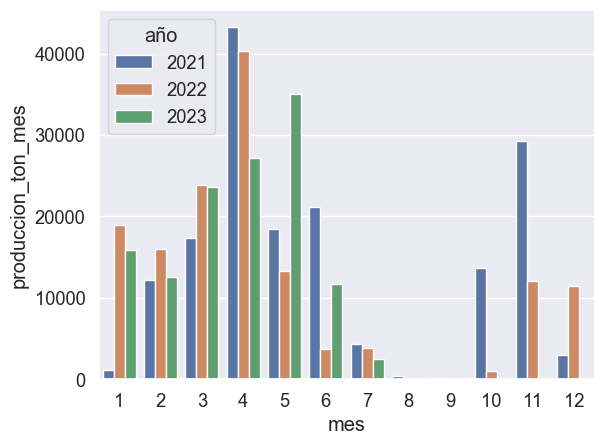

In [45]:
sns.barplot(x="mes",
            y="produccion_ton_mes",
            hue="año",
            errorbar=None,
            data=df_ags)